# Rookie Blues
## Which Fantastic Rookie Hitting Campaigns Were Overlooked when the Rookie of the Year Award Went To A Pitcher?

#### Authored by Ben Mescher, for submission "P2-Investigate a Dataset" as part of Udacity's Data Analyst Nanodegree program

##### Submission History: 
* 2015-Dec-23: Initial Udacity submit and upload to GitHub (https://github.com/benmesch/DataAnalysis.git)
* 2015-Dec-24: Code typos

#### Intro:
At the close of each Major League Baseball season, the members of the Baseball Writers' Association of America vote on and bestow the Rookie of The Year (ROTY) award to two outstanding first year players: one to a player in the National League (NL) and one to a player in the American League (AL).

With only a single award handed out to each league, it is not uncommon for a brilliant, though not the-best-that-year rookie campaign to be bypassed for ROTY honors.

A player is only eligible for the ROTY award one time in his career (during his first full Major League season), and I have always felt particular sympathy for those players who put in brilliant rookie seasons but are overshadowed by an even more brilliant rookie campaign from a fellow first-year peer.
#### Motivation
Another quirk of the ROTY is that unlike say the Cy Young or annual Batting Title, both pitchers and position players may be named their league's Rookie of The Year. 

Imagine you are a position player. You are tasked with the most difficult job in sports: hitting a baseball. You work your way up and into the Major Leagues and launch an impressive rookie campaign. Unfortunately, while your stellar hitting statistics may have earned you the Rookie of The Year Award most other seasons, you just happened to start your career at the same time as an absolute ace of a pitcher. The Writers award you a few votes but there is no real competition: the final vote tally and the award go to the pitcher. Yes, that guy whose sole job is to thin your already difficult odds at the 'hit a baseball' task. *That* guy has won your Rookie of the Year. 

Well, hypothetical snubbed position player, perk-up! Because this data analysis is all for you. **The following analysis asks the question: for the years in which a pitcher was named his league's Rookie of The Year, were there any stand out hitters who might have otherwise been named the Rookie of the Year?**

#### Notes: 
I will only look at batting statistics for rookies, not fielding. Good defensive fielding is an important component to a rookie's resume but much harder to quantify.

I realize that pitchers can hit and that some ROTY pitchers have even been known as 'good hitters'. We will see later  that on hitting alone, ROTY pitchers are no where close to the standards we hold true hitting ROTY.

Future: would be cool to compare rookie batting raw numbers with how much of their team's share of batting they contributed, and how well their team did compared to the rest of the league.

The dataset used for this analysis is the 2014 Lahman Baseball Database (http://seanlahman.com/files/database/readme2014.txt), a Creative Commons licensed collection of various baseball statistics from the 1871 to 2014 seasons in the Major Leagues. From the 2014 readme on the design of the Lahman database:

``` 
The database is comprised of the following main tables:

  MASTER - Player names, DOB, and biographical info
  Batting - batting statistics
  Pitching - pitching statistics

It is supplemented by these tables:
  AwardsPlayers - awards won by players
  AwardsSharePlayers - award voting for player awards
  Appearances - details on the positions a player appeared at
  Teams - yearly stats and standings 
  TeamsHalf - split season data for teams
```
  
We begin by importing some handy Python libraries and doing a bit of housecleaning for plots:


In [1]:
%pylab inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',50)


Populating the interactive namespace from numpy and matplotlib


/Users/ben/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


First, we will import the Lahman data on all past Rookie of the Year recipients, 136 in total. Then we display the player backgrounds for the five first (starting with Jackie Robinson in 1947) and five most recent ROTY (ending with Jacob deGrom in 2014).

In [2]:
dfROTYwinners = pd.read_csv('AwardsPlayers.csv')
dfROTYwinners = dfROTYwinners.loc[dfROTYwinners['awardID'] == 'Rookie of the Year'][['playerID','yearID','lgID']]
#the first two ROTY were awarded with lgID='ML' because only one was given. later years had two: one for AL one for NL
dfROTYwinners.count()

playerID    136
yearID      136
lgID        136
dtype: int64

In [3]:
dfMaster = pd.read_csv('MASTER.csv')
dfMaster = dfMaster[['playerID','nameFirst','nameLast','debut','finalGame','birthYear','birthMonth','birthDay','birthCountry','weight','height','bats','throws']]
dfROTYwinners = dfROTYwinners.merge(dfMaster,how='inner',on=['playerID'])
dfMaster = None
dfROTYwinners.head()

,playerID,yearID,lgID,nameFirst,nameLast,debut,finalGame,birthYear,birthMonth,birthDay,birthCountry,weight,height,bats,throws
0,robinja02,1947,ML,Jackie,Robinson,4/15/1947,9/30/1956,1919,1,31,USA,195,71,R,R
1,darkal01,1948,ML,Al,Dark,7/14/1946,10/2/1960,1922,1,7,USA,185,71,R,R
2,sievero01,1949,AL,Roy,Sievers,4/21/1949,5/9/1965,1926,11,18,USA,195,73,R,R
3,newcodo01,1949,NL,Don,Newcombe,5/20/1949,10/1/1960,1926,6,14,USA,220,76,L,R
4,dropowa01,1950,AL,Walt,Dropo,4/19/1949,5/17/1961,1923,1,30,USA,220,77,R,R


In [4]:
dfROTYwinners.tail()

,playerID,yearID,lgID,nameFirst,nameLast,debut,finalGame,birthYear,birthMonth,birthDay,birthCountry,weight,height,bats,throws
131,harpebr03,2012,NL,Bryce,Harper,4/28/2012,9/28/2014,1992,10,16,USA,225,75,L,R
132,myerswi01,2013,AL,Wil,Myers,6/18/2013,9/28/2014,1990,12,10,USA,205,75,R,R
133,fernajo02,2013,NL,Jose,Fernandez,4/7/2013,5/9/2014,1992,7,31,Cuba,225,74,R,R
134,abreujo02,2014,AL,Jose,Abreu,3/31/2014,9/27/2014,1987,1,29,Cuba,255,75,R,R
135,degroja01,2014,NL,Jacob,deGrom,5/15/2014,9/21/2014,1988,6,19,USA,180,76,L,R


The Lahman database also contains batting statistics aggregated over a player's entire season. We can calculate other statistics from the base Lahman database, such as batting average ('ba', equal to hits divided by at bats). 

In [5]:
dfBatting = pd.read_csv('Batting.csv')
dfBatting = dfBatting[['playerID','yearID','lgID','G','AB','R','H','2B','3B','HR','RBI','SB','CS','BB','SO','IBB','HBP','GIDP']]
dfBatting = dfBatting.rename(columns = {'lgID':'battinglgID'})

#use a function and df.apply() to create a new 'ba' column for 3 decimal placed batting average
def round_three(flt):
    return round(flt,3)

#add batting average to our batting dataframe
dfBatting['ba'] = dfBatting['H'] / dfBatting['AB']
dfBatting['ba'] = dfBatting['ba'].apply(round_three)
#rearrange columns to place batting average closer to the left
dfBatting = dfBatting[['playerID','yearID','G','ba','AB','R','H','2B','3B','HR','RBI','SB','CS','BB','SO','IBB','HBP','GIDP','battinglgID']]

dfROTYwinnersBatting = dfROTYwinners[['playerID','nameFirst','nameLast','yearID','lgID']].merge(dfBatting,how='inner',on=['playerID','yearID'])

#print dfROTYwinnersBatting.count()

dfROTYwinnersBatting = dfROTYwinnersBatting.fillna(0)

Plotting the number of at bats and games played over all ROTY-winning seasons, we see many peaks and valleys in the data: these represent the vast differences in batting production between rookie pitchers and rookie batters.

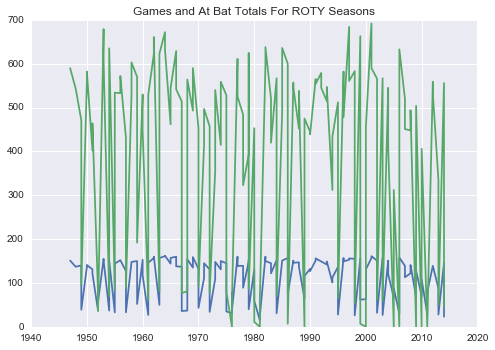

In [6]:
plt.plot(dfROTYwinnersBatting['yearID'],dfROTYwinnersBatting[['G','AB']])
plt.title('Games and At Bat Totals For ROTY Seasons')

This analysis is based on this premise: in those pitcher-winning ROTY seasons (the 'valleys' in the plot above), were there any stand out rookie batters who might have otherwise taken home that year's ROTY, had a pitcher not ultimately been named for the award?

Before searching for the ROTY snubs, lets first compare the batting numbers for the 37 ROTY pitchers and the 99 ROTY hitters.

In [7]:
dfPitching = pd.read_csv('Pitching.csv')
dfPitching = dfPitching[['playerID','teamID','yearID','W','L','G','GS','CG','SV','SHO','ER','BAOpp','SO','H','HR','BB','R','BFP']]
dfROTYwinnersPitching = dfROTYwinners[['playerID','nameFirst','nameLast','yearID','lgID']].merge(dfPitching,how='inner',on=['playerID','yearID'])
dfPitching = None
#print dfRookiePitching.count()
dfROTYwinnersPitching = dfROTYwinnersPitching.fillna(0)
#dfROTYwinnersPitching

In [8]:
#split the batting numbers for the pitchers and the non pitchers
pitchers = dfROTYwinnersBatting['playerID'].isin(dfROTYwinnersPitching['playerID'])
hitters = ~dfROTYwinnersBatting['playerID'].isin(dfROTYwinnersPitching['playerID'])
dfROTYwinnersBattingPitchers = dfROTYwinnersBatting.loc[pitchers]
dfROTYwinnersBattingHitters = dfROTYwinnersBatting.loc[hitters]

In [9]:
pitcherRowCount = dfROTYwinnersBattingPitchers.shape[0]
print 'Highest Batting Averages by Pitcher ROTY (out of {} campaigns):'.format(pitcherRowCount)
dfROTYwinnersBattingPitchers.sort_values('ba',ascending=False).head()

Highest Batting Averages by Pitcher ROTY (out of 37 campaigns):


,playerID,nameFirst,nameLast,yearID,lgID,G,ba,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,GIDP,battinglgID
111,jennija01,Jason,Jennings,2002,NL,32,0.306,62,6,19,4,0,0,11,0,0,3,13,0,1,0,NL
30,peterga01,Gary,Peters,1963,AL,50,0.259,81,12,21,4,1,3,12,0,0,3,19,1,1,1,AL
69,valenfe01,Fernando,Valenzuela,1981,NL,25,0.250,64,3,16,0,1,0,7,0,0,1,9,0,0,0,NL
65,sutclri01,Rick,Sutcliffe,1979,NL,40,0.247,85,6,21,3,0,1,17,0,0,1,20,0,0,4,NL
113,willido03,Dontrelle,Willis,2003,NL,27,0.241,58,2,14,2,0,1,4,0,0,3,8,0,0,0,NL


In [10]:
hitterRowCount = dfROTYwinnersBattingHitters.shape[0]
print 'Lowest Batting Averages by Non Pitcher ROTY (out of {} campaigns):'.format(hitterRowCount)
dfROTYwinnersBattingHitters.sort_values('ba',ascending=True).head()

Lowest Batting Averages by Non Pitcher ROTY (out of 99 campaigns):


,playerID,nameFirst,nameLast,yearID,lgID,G,ba,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,GIDP,battinglgID
114,crosbbo01,Bobby,Crosby,2004,AL,151,0.239,545,70,130,34,1,22,64,7,3,58,141,0,9,20,AL
78,cansejo01,Jose,Canseco,1986,AL,157,0.240,600,85,144,29,1,33,117,15,7,65,175,1,8,12,AL
35,lefebji01,Jim,Lefebvre,1965,NL,157,0.250,544,57,136,21,4,12,69,3,5,71,92,7,2,8,NL
82,weisswa01,Walt,Weiss,1988,AL,147,0.250,452,44,113,17,3,3,39,4,4,35,56,1,9,9,AL
72,kittlro01,Ron,Kittle,1983,AL,145,0.254,520,75,132,19,3,35,100,8,3,39,150,8,8,10,AL


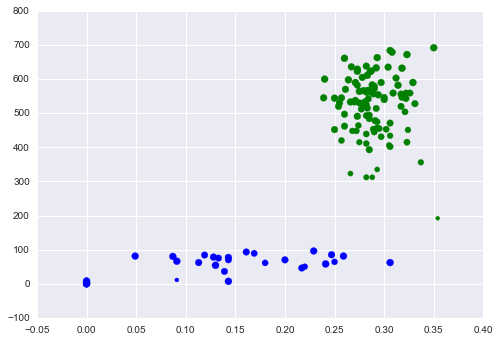

In [11]:
batterGamesPlayed = dfROTYwinnersBattingHitters['G'] / 162 * 50
pitcherGamesPlayed = dfROTYwinnersBattingHitters['G'] / 162 * 50

plt.scatter(dfROTYwinnersBattingHitters['ba'],dfROTYwinnersBattingHitters['AB'], color='green', s=batterGamesPlayed)
plt.scatter(dfROTYwinnersBattingPitchers['ba'],dfROTYwinnersBattingPitchers['AB'], color='blue', s=pitcherGamesPlayed)

The tables above show that the five best batting averages for pitchers are somewhere in the neighborhood of the five worst batting averages for non-pitchers. The real difference, however, is in the sample size: the pitchers tally far fewer at bats than the non-pitchers. Such small sample sizes can mean that Jason Jennings' 0.306 batting average on 62 at bats in 2002 is not as impressive as Nomar Garciaparra's 0.306 batting average on 684 at bats in 1997.

ROTY At Bats Histogram for Pitchers (Blue) and NonPitchers (Green)


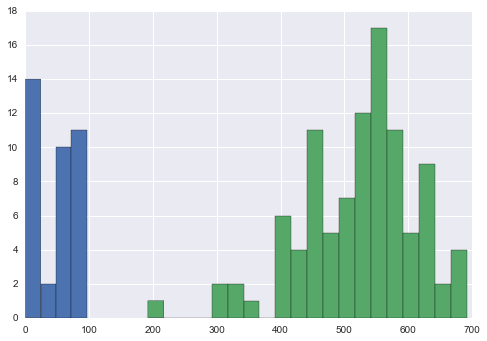

In [12]:
print "ROTY At Bats Histogram for Pitchers (Blue) and NonPitchers (Green)"
dfROTYwinnersBattingPitchers['AB'].hist(bins=4)
dfROTYwinnersBattingHitters['AB'].hist(bins=20)

ROTY Games Batted Histogram for Pitchers (Blue) and NonPitchers (Green)


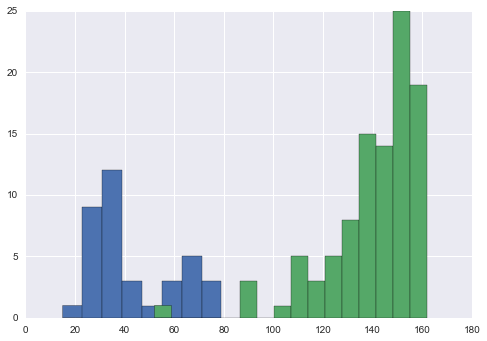

In [13]:
print "ROTY Games Batted Histogram for Pitchers (Blue) and NonPitchers (Green)"
dfROTYwinnersBattingPitchers['G'].hist(bins=8)
dfROTYwinnersBattingHitters['G'].hist(bins=16)

Returning to again plot ROTY games and at bats over time but this time only for non-pitchers, we can see more consistency:

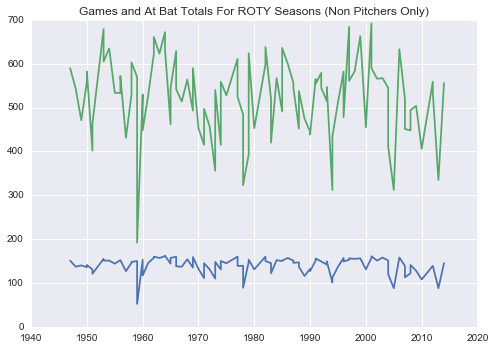

In [14]:
plt.plot(dfROTYwinnersBattingHitters['yearID'],dfROTYwinnersBattingHitters[['G','AB']])
plt.title('Games and At Bat Totals For ROTY Seasons (Non Pitchers Only)')

For the record, the lone non pitcher ROTY with fewer than 200 at bats and fewer than 60 games played during their rookie campaign is Willie McCovey in 1959. McCovey was called up to the majors with just two months left in the regular season, yet managed to make enough of his short debut season (including two singles, two triples, two RBI, and three runs scored *in his first game*) to earn ROTY honors. McCovey was inducted into the Hall of Fame in 1986 and a bronze statue of his likeness sits outside the Giants stadium and just near an inlet of San Francisco bay now known as ['McCovey Cove'](http://www.mensjournal.com/adventure/watersports/baseball-from-the-bay-20130319).

In [15]:
dfROTYwinnersBattingHitters.loc[dfROTYwinnersBattingHitters['playerID']=='mccovwi01']

,playerID,nameFirst,nameLast,yearID,lgID,G,ba,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,GIDP,battinglgID
23,mccovwi01,Willie,McCovey,1959,NL,52,0.354,192,32,68,9,5,13,38,2,0,22,35,1,4,7,NL


We next turn to finding non-pitching, honorary ROTY in years where the ROTY was actually awarded to a pitcher. We must first define which year in a player's career is eligible for consideration as a rookie campaign. Since 1971, ROTY voters have used:

*The current standard of 130 at bats, 50 innings pitched or 45 days on the active roster of a Major League club (excluding time in military service or on the disabled list) before September 1 [of the previous year].* -Wikipedia ["Major League Baseball Rookie of the Year Award"](https://en.wikipedia.org/wiki/Major_League_Baseball_Rookie_of_the_Year_Award)

For our analysis and based on the data available in the Lahman files, that will mean players become eligible in the first season they record at least 130 at bats.

In [16]:
#lets look for the first year a player had 130 at bats or more...
dfBattingCandidatesAllRookies = dfBatting.loc[dfBatting['AB']>130]
dfBattingCandidatesAllRookies = dfBattingCandidatesAllRookies[['playerID','yearID']].groupby(['playerID'], as_index=False).min()
dfBattingCandidatesAllRookies = dfBattingCandidatesAllRookies.merge(dfBatting,how='inner',on=['playerID','yearID'])

#save the pool of all candidates to a new dataframe that we can begin to filter
dfBattingCandidates = dfBattingCandidatesAllRookies 

#only need to look at years and leagues where the ROTY was awarded to a pitcher
ROTY_to_pitcher = dfROTYwinnersPitching[['yearID','lgID']]
dfBattingCandidates = dfBattingCandidates.merge(ROTY_to_pitcher,how='inner',right_on=['yearID','lgID'],left_on=['yearID','battinglgID'])
dfBattingCandidates['playerID'].count()

882

In [17]:
def grp_plot(df):
    grp = df[['yearID','playerID']].groupby('yearID', as_index=False).count()
    plt.scatter(grp['yearID'],grp['playerID'])
    plt.title('Eligible rookies by year ({} total rookies)'.format(df.shape[0]))

candidate rookies: more than 130 at bats in year and league where ROTY was awarded to pitcher


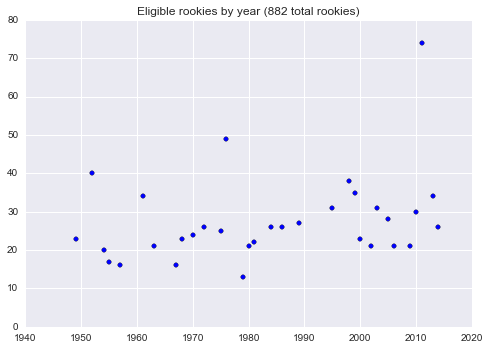

In [18]:
print "candidate rookies: more than 130 at bats in year and league where ROTY was awarded to pitcher"
grp_plot(dfBattingCandidates)

We will narrow our search for these snub-ROTY candidates by looking for rookie campaigns comparable to our sample of actual non-pitching ROTY. With respect to Mr. McCovey, that will first and foremost mean candidates must have more than 100 games played and 400 at bats.

candidate rookies with more than 100 games played during campaign season


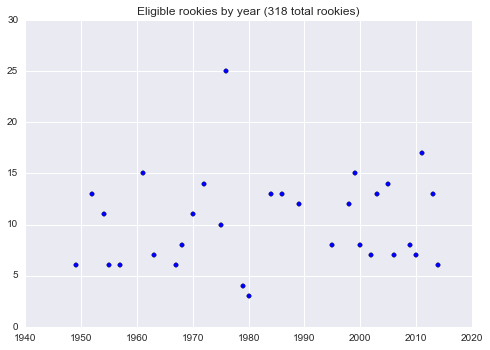

In [19]:
dfBattingCandidates_100g = dfBattingCandidates.loc[dfBattingCandidates['G']>100]
print "candidate rookies with more than 100 games played during campaign season"
grp_plot(dfBattingCandidates_100g)

candidate rookies with more than 100 games played and 400 at bats


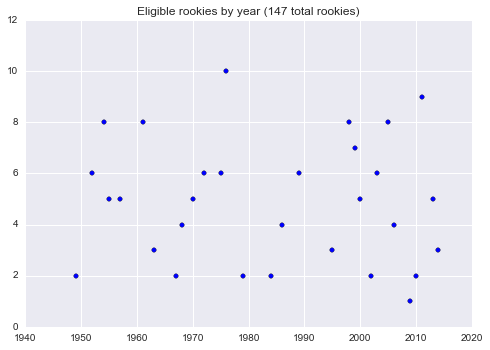

In [20]:
dfBattingCandidates_100g_400ab = dfBattingCandidates_100g.loc[dfBattingCandidates_100g['AB']>400]
print "candidate rookies with more than 100 games played and 400 at bats"
grp_plot(dfBattingCandidates_100g_400ab)

Requiring our eligible candidates to have more than 100 games played and 400 at bats leaves us with 147 potential rookie snubs remaining. The following three tables compare actual ROTY winners, our 147 remaining potential rookie snubs, and the larger pool of numbers from all 882 rookie seasons in the Lahman database.

In [21]:
print "Actual ROTY winners"
dfROTYwinnersBattingHitters.describe()

Actual ROTY winners


,yearID,G,ba,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,GIDP
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,1980.090909,140.363636,0.289000,523.191919,80.222222,151.121212,26.494949,5.212121,17.282828,71.141414,13.464646,5.707071,48.959596,85.494949,3.444444,4.585859,10.191919
std,18.926329,19.004540,0.022984,91.068451,21.285022,29.407160,8.085479,3.204820,10.859060,23.487300,16.713866,4.866069,18.268920,32.876197,3.523166,3.741685,4.771678
min,1947.000000,52.000000,0.239000,192.000000,32.000000,68.000000,9.000000,0.000000,1.000000,31.000000,0.000000,0.000000,12.000000,31.000000,0.000000,0.000000,2.000000
25%,1964.000000,132.000000,0.273500,459.500000,64.000000,133.500000,21.000000,2.000000,8.000000,51.500000,3.000000,2.000000,34.000000,58.000000,1.000000,2.000000,7.000000
50%,1980.000000,146.000000,0.286000,538.000000,78.000000,149.000000,26.000000,5.000000,18.000000,68.000000,7.000000,5.000000,48.000000,83.000000,2.000000,3.000000,10.000000
75%,1995.500000,152.500000,0.304500,582.000000,93.500000,171.000000,31.000000,7.000000,24.500000,86.500000,19.500000,7.000000,61.500000,111.500000,5.500000,6.000000,12.000000
max,2014.000000,162.000000,0.354000,692.000000,129.000000,242.000000,47.000000,17.000000,49.000000,144.000000,110.000000,25.000000,100.000000,175.000000,16.000000,20.000000,24.000000


In [22]:
print "Rookies with 100 games and 400 at bats"
dfBattingCandidates_100g_400ab.describe()

Rookies with 100 games and 400 at bats


,yearID,G,ba,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,GIDP
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,145.000000,147.000000,147.000000,131.000000,147.000000,147.000000
mean,1983.428571,138.285714,0.265714,494.993197,63.857143,131.632653,23.081633,4.020408,11.210884,56.857143,10.299320,4.868966,43.673469,80.408163,2.908397,3.598639,10.238095
std,20.681207,12.852695,0.023845,60.827681,15.284516,20.607912,7.274002,2.931803,7.330955,16.516907,11.851487,4.000443,16.520292,33.095494,2.460301,3.155035,4.490985
min,1949.000000,110.000000,0.208000,402.000000,30.000000,86.000000,9.000000,0.000000,0.000000,16.000000,0.000000,0.000000,14.000000,19.000000,0.000000,0.000000,1.000000
25%,1965.000000,129.000000,0.250000,448.000000,53.500000,118.000000,17.000000,2.000000,5.000000,43.500000,3.000000,2.000000,33.000000,59.000000,1.000000,1.000000,6.500000
50%,1984.000000,138.000000,0.266000,488.000000,64.000000,131.000000,23.000000,4.000000,10.000000,57.000000,7.000000,4.000000,42.000000,74.000000,2.000000,3.000000,10.000000
75%,2003.000000,149.000000,0.282000,532.500000,72.000000,143.500000,28.000000,5.000000,16.000000,70.000000,13.000000,7.000000,52.000000,101.000000,4.000000,5.000000,14.000000
max,2014.000000,162.000000,0.321000,701.000000,108.000000,191.000000,44.000000,19.000000,33.000000,97.000000,72.000000,23.000000,95.000000,171.000000,12.000000,19.000000,21.000000


In [23]:
print "All eligible rookies"
dfBattingCandidatesAllRookies.describe()

All eligible rookies


,yearID,G,ba,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,GIDP
count,6248.000000,6248.000000,6243.000000,6248.000000,6248.000000,6248.000000,6248.000000,6248.000000,6248.000000,6137.000000,6067.000000,4115.000000,6248.000000,5362.000000,3116.000000,5794.000000,3866.000000
mean,1950.312740,86.031210,0.251719,279.089789,36.017606,72.381082,11.724072,2.961108,4.389565,30.814730,6.296522,2.981774,22.833867,41.187803,1.754172,2.200035,6.072944
std,42.061407,36.224486,0.048746,140.536105,22.744276,41.245104,7.983759,3.111851,5.579293,20.987472,9.304229,3.425491,16.854017,27.350714,2.219836,2.598289,4.266947
min,1871.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1913.000000,59.000000,0.228000,169.000000,19.000000,41.000000,6.000000,1.000000,1.000000,16.000000,1.000000,1.000000,11.000000,22.000000,0.000000,0.000000,3.000000
50%,1954.000000,82.000000,0.255000,244.000000,30.000000,62.000000,10.000000,2.000000,2.000000,26.000000,3.000000,2.000000,19.000000,35.000000,1.000000,1.000000,5.000000
75%,1988.000000,114.000000,0.278000,374.000000,48.000000,98.000000,16.000000,4.000000,6.000000,41.000000,8.000000,4.000000,31.000000,55.000000,3.000000,3.000000,8.000000
max,2014.000000,163.000000,1.000000,701.000000,165.000000,242.000000,52.000000,28.000000,49.000000,145.000000,111.000000,32.000000,123.000000,185.000000,19.000000,29.000000,28.000000


Comparing these tables can give a few more ideas on what separates ROTY winners from the pool of all rookies and what filters we can implement on our candidate rookies to better approximate the population of ROTY winners. I have chosen to filter our candidates by batting average (requiring 0.282, which is the 75th percentile of the remaining candidates) and by runs scored (requiring 60 or more, approximately the 50th percentile of the remaining candidates and 25th for actual ROTY winners) 

These last two filters brings us to a final pool of 30 candidates for ROTY snubs across 20 of the 37 pitcher-awarded ROTY league seasons.

In [24]:
dfBattingCandidates_100g_400ab_282ba = dfBattingCandidates_100g_400ab.loc[dfBattingCandidates_100g_400ab['ba']>0.282]
dfBattingCandidates_100g_400ab_282ba_60r = dfBattingCandidates_100g_400ab_282ba.loc[dfBattingCandidates_100g_400ab_282ba['R']>=60]
remainingCandidateCount = dfBattingCandidates_100g_400ab_282ba_60r.shape[0]
print "Rookie players (first season with 130+ at bats in a year and league where ROTY was awarded to a pitcher),"
print "  who played in more than 100 games, had more than 400 at bats," 
print "  held a batting average over 0.282, and scored 60 or more runs: {} candidates remaining".format(remainingCandidateCount)
#dfBattingCandidates_100g_400ab_282ba_60r.sort_values('yearID',ascending=False)

Rookie players (first season with 130+ at bats in a year and league where ROTY was awarded to a pitcher),
  who played in more than 100 games, had more than 400 at bats,
  held a batting average over 0.282, and scored 60 or more runs: 30 candidates remaining


We have combed the Lahman database and found 30 potential snubs for ROTY. But how did these 30 campaigns actually fare in the ROTY voting? The following table displays the names, year, and league of our 30 snubs. It also displays the name of the pitcher who ultimately took home the Rookie of The Year Award for the snubbed player's year and league. The 'pct of max vote behind pitcher' column displays the decimal percentage difference between the winning pitcher and our snubbed hitter, relative to the total number of voting points avialble in that year's award poll.

In [25]:
dfAwardsSharePlayers = pd.read_csv('AwardsSharePlayers.csv')
dfAwardsSharePlayers = dfAwardsSharePlayers.loc[dfAwardsSharePlayers['awardID']=='Rookie of the Year']
dfAwardsSharePlayers = dfAwardsSharePlayers[['yearID','lgID','playerID','pointsWon','pointsMax','votesFirst']]

In [26]:
winners = dfROTYwinnersPitching[['playerID','yearID','nameFirst','nameLast']].merge(dfAwardsSharePlayers[['playerID','yearID','lgID','pointsWon','pointsMax']],how='inner',on=['playerID','yearID'])
winners = winners.rename(columns = {'playerID':'pitcherID','pointsWon':'pitcherptsWon','nameFirst':'pitcherNmFirst','nameLast':'pitcherNmLast','pointsMax':'ptsMax'})
#winners.sort_values('yearID',ascending=False)

candidates = dfBattingCandidates_100g_400ab_282ba_60r[['playerID','yearID','lgID']].merge(dfAwardsSharePlayers[['playerID','yearID','lgID','pointsWon']],how='left',on=['playerID','yearID','lgID'])
#candidates.sort_values('yearID',ascending=False)

snubs = candidates.merge(winners,how='left',on=['yearID','lgID'])
snubs['pct of max vote behind pitcher'] = ( snubs['pitcherptsWon'] - snubs['pointsWon'] ) / snubs['ptsMax']
snubs['pct of max vote behind pitcher'] = snubs['pct of max vote behind pitcher'].apply(round_three) * 100
snubs['pct of max vote behind pitcher'] = snubs['pct of max vote behind pitcher'].fillna(100.0)

#add names...
dfMaster = pd.read_csv('MASTER.csv')
dfMaster = dfMaster[['playerID','nameFirst','nameLast']]
snubs = snubs.merge(dfMaster,how='inner',on='playerID')
dfMaster = None

snubs = snubs[['yearID','lgID','nameFirst','nameLast','pointsWon','pitcherNmFirst','pitcherNmLast','pitcherptsWon','ptsMax','pct of max vote behind pitcher']]
snubs.sort_values(['pct of max vote behind pitcher','yearID'],ascending=False)

,yearID,lgID,nameFirst,nameLast,pointsWon,pitcherNmFirst,pitcherNmLast,pitcherptsWon,ptsMax,pct of max vote behind pitcher
3,2005,AL,Emil,Brown,NaN,Huston,Street,97,140,100.0
5,2005,AL,Joe,Mauer,NaN,Huston,Street,97,140,100.0
26,2003,NL,Alex,Cintron,NaN,Dontrelle,Willis,118,160,100.0
6,1999,NL,Ronnie,Belliard,NaN,Scott,Williamson,118,160,100.0
10,1995,NL,Rondell,White,NaN,Hideo,Nomo,118,140,100.0
18,1989,AL,Roberto,Kelly,NaN,Gregg,Olson,136,140,100.0
24,1979,NL,Ray,Knight,NaN,Rick,Sutcliffe,20,24,100.0
15,1972,NL,Dusty,Baker,NaN,Jon,Matlack,19,24,100.0
20,1970,NL,Billy,Grabarkewitz,NaN,Carl,Morton,11,24,100.0
17,1957,NL,Gino,Cimoli,NaN,Jack,Sanford,16,24,100.0


#### Conclusions
Of our 30 snubs, we can take heart knowing that at least Todd Helton (1998 NL) was very, very close to taking home the Rookie of The Year, missing the award by just 5.6% of the total vote. 

Seventeen other snubs from our results did at least receive some of the final vote for Rookie of The Year. None of these seventeen came as close to winning as Todd Helton. By splitting the vote in an otherwise close race, a pair of non-pitchers (Terrance Long and Mark Quinn) may have inadvertently helped pitcher Kazuhiro Sasaki take home the 2000 AL Rookie of the Year.

Which leaves us with twelve snubs who did not even earn a single ROTY vote. These 'super snubs' can be categorized as follows: four players (Alex Cintron (2003 NL), Joe Mauer (2005 AL), Emil Brown (2005 AL), and Ronnie Belliard (1999 NL)) seem to have lost votes due to multiple other non-pitching rookies putting up impressive campaigns in their respective league and rookie season. 

Rondell White was actually considered a rookie in the 1994 season but quirks in the data and our analysis have icorrectly labeled his rookie season as 1995 (White only played 97 games in 1994 but that was still considered his rookie year due to sitting on the bench for much of the season, the 1994 season was cut short due to a player's strike). 

Finally, the other seven super snubs occurred before the 1990's. Perhaps the more limited size of the baseball media in the pre-internet era meant it was harder for a good (but not *great*) rookie hitter to garner national attention.

###### Trivia: 
* Jackie Robinson won the first national ROTY award in 1947.
* The first two ROTY were awarded to a single player. Thereafter, one award was given each to the AL and NL.
* Players have tied for the ROTY two times: Butch Metzger and Pat Zachry shared the 1976 NL award. John Castino and Alfredo Griffin shared the 1979 AL award. Metzger and Zachry were both pitchers, while Castino and Griffin were not.

#### References:
* Wikipedia "Major League Baseball Rookie of the Year Award" (https://en.wikipedia.org/wiki/Major_League_Baseball_Rookie_of_the_Year_Award)
* 2014 Lahman Baseball Database (http://seanlahman.com/files/database/readme2014.txt)